# PISA Data
## Communicate your data project
### By: Mohamed Sharif

# Investigation Overview
### We are looking forward to exploring the dataset with paying special attention to the scores of the students and trying to find the things that affect their scores using multiple visualizations.

Completing work after doing preliminary wrangling in the previous file.
This document explores the cleaned dataset of the PISA 2012.

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [83]:
# reading the cleaned data into a dataframe
df=pd.read_csv('data_cleaned.csv')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [84]:
#Overviewing our data and its main features
print(df.shape)
print(df.info())
print(df.head(10))

(485490, 30)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 0 to 485489
Data columns (total 30 columns):
CNT                   485490 non-null object
gender                485490 non-null object
AGE                   485374 non-null float64
score                 485490 non-null float64
math_behav            313847 non-null float64
math_self_efficacy    315948 non-null float64
math_work_ethic       314501 non-null float64
att_learn_otcm        312584 non-null float64
att_learn_actv        311675 non-null float64
BELONG                313399 non-null float64
f_sq                  416150 non-null float64
m_sq                  364814 non-null float64
WEALTH                479597 non-null float64
MISCED                467085 non-null object
m_occ                 483887 non-null object
f_occ                 482936 non-null object
parent_ed             473091 non-null float64
teach_supp            316371 non-null float64
internship            160533 non-null object
Learning

In [85]:
#The main statistics of the quantitative data
df.describe()

,AGE,score,math_behav,math_self_efficacy,math_work_ethic,att_learn_otcm,att_learn_actv,BELONG,f_sq,m_sq,...,teach_supp,Learning time,math_efficacy,thought,Anxious,love_maths,exp,par_thought,math_exp,math_lesson
count,485374.000000,485490.000000,313847.000000,315948.000000,314501.000000,312584.000000,311675.000000,313399.000000,416150.000000,364814.000000,...,316371.000000,283303.000000,310166.000000,312694.000000,310240.000000,153294.000000,311052.000000,311682.000000,96673.000000,220144.000000
mean,15.784283,469.621653,0.241209,-0.046626,0.135775,0.051644,0.041384,-0.022259,42.423367,44.408617,...,0.152789,226.007056,2.954127,2.988886,2.433367,2.554407,2.812790,3.066485,3.461908,0.163619
std,0.290221,103.265391,1.054971,0.973588,1.009700,1.002942,0.997704,0.983503,21.622126,22.018510,...,0.995688,97.448421,0.608161,0.740661,0.713786,0.709169,0.656381,0.610225,0.322460,0.316833
min,15.170000,19.792800,-2.140200,-3.750000,-3.450300,-2.990000,-3.375800,-3.690000,11.010000,11.010000,...,-2.920000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000
25%,15.580000,395.318600,-0.456700,-0.630000,-0.401700,-0.640000,-0.939400,-0.740000,25.390000,25.040000,...,-0.470000,180.000000,2.500000,2.500000,2.000000,2.000000,2.333333,2.666667,3.333333,0.000000
50%,15.750000,466.201900,0.217100,-0.180000,0.109900,-0.240000,0.087300,-0.150000,34.250000,43.330000,...,0.110000,220.000000,3.000000,3.000000,2.333333,2.500000,3.000000,3.000000,3.333333,0.000000
75%,16.000000,541.057800,0.811000,0.540000,0.649000,0.770000,1.211500,0.560000,60.920000,65.010000,...,0.970000,250.000000,3.333333,3.500000,3.000000,3.000000,3.333333,3.666667,3.666667,0.333333
max,16.330000,962.229300,4.424900,2.270000,2.716700,2.350000,1.211500,2.630000,88.960000,88.960000,...,1.680000,3000.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [86]:
# convert intrnt_frst,comp_frst,MISCED into ordered categorical types
ordinal_var_dict = {'intrnt_frst': ['6 years old or younger','7-9 years old','10-12 years old','13 years old  or older',
                                    'Never']
                   ,'comp_frst': ['6 years old or younger','7-9 years old','10-12 years old','13 years old  or older',
                                    'Never'],
                    'MISCED':['None','ISCED 1','ISCED 2','ISCED 3B, C','ISCED 3A, ISCED 4',
                              'ISCED 5B','ISCED 5A, 6']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

# Dataset Overview

## What is the structure of your dataset?
There are 485490 students that took part in the PISA 2012 test, they provide answers and inputs for  30 variables like  country, gender, their maths score,...etc. We had to convert some data from categories to numeric to combine them.


## What is/are the main feature(s) of interest in your dataset?
I'm most interested in figuring out what features are best for predicting the maths score, and whether some variables like country, gender affect the overall score. 

## What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I expect that parental status like wealth should affect the overall score, location as well. I also would test to see if the teacher's support had a weight on that. Moreover I will categorize the data according to gender to see if it would make a difference.

# Univariate Exploration
I'll start by looking at the distribution of the main variable of interest: score.

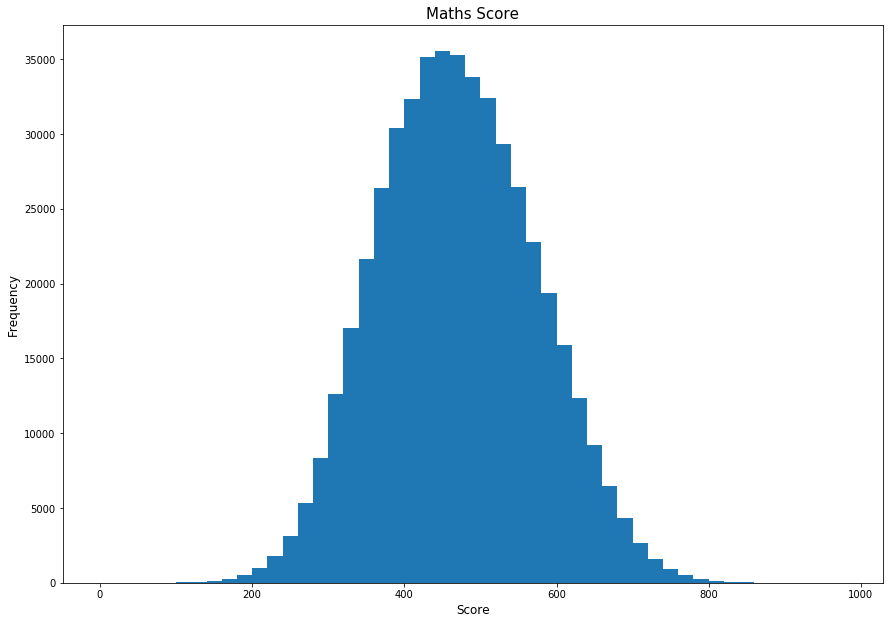

In [87]:
# start with a standard histogram plot of the score
binsize = 20
bins = np.arange(0, df['score'].max()+binsize, binsize)

plt.figure(figsize=[14.7,10.27])
plt.hist(data = df, x = 'score', bins = bins)
plt.title('Maths Score',size=15)
plt.xlabel('Score',size=12)
plt.ylabel('Frequency',size=12);

#### The data is normally distributed. Therefore the peak(the mode) is nearly at the mean at 469.

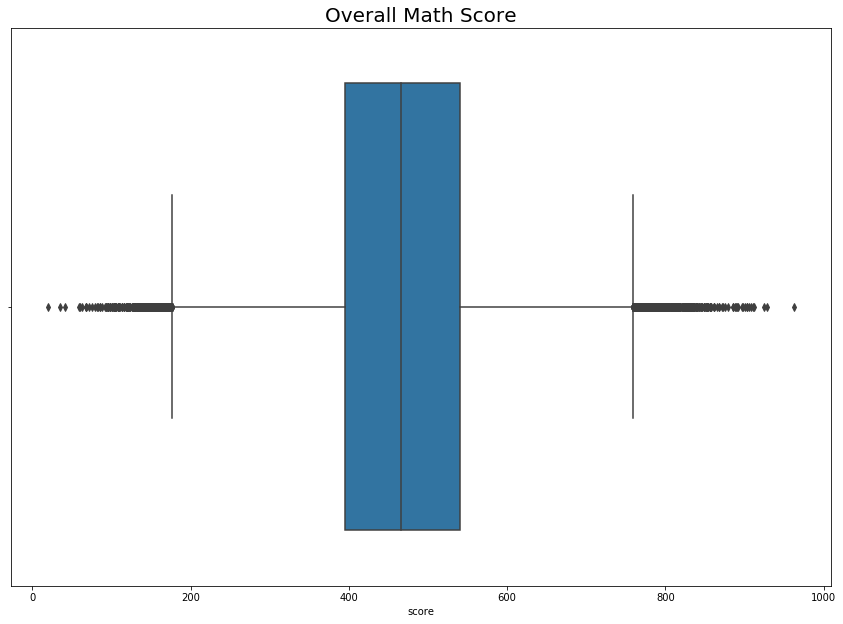

In [88]:
#Box plot of the math score
plt.figure(figsize=[14.7,10.27])
default_color = sb.color_palette()[0]
sb.boxplot(df['score'], color=default_color)
plt.title('Overall Math Score', size=20);

#### The box plot shows that we have data centered at around 460 with the some outliers beyond 790 and lower than 180.

## Next, we would move to the other predictor variables, like, Age, country, Gender, ...etc

In [89]:
df['CNT'].value_counts()

Mexico                      33806
Italy                       31073
Spain                       25313
Canada                      21544
Brazil                      19204
Australia                   14481
United Kingdom              12659
United Arab Emirates        11500
Switzerland                 11229
Qatar                       10966
United States of America    10294
Colombia                     9073
Finland                      8829
Belgium                      8597
Denmark                      7481
Jordan                       7038
Chile                        6856
Thailand                     6606
Japan                        6351
Chinese Taipei               6046
Peru                         6035
Slovenia                     5911
Argentina                    5908
Kazakhstan                   5808
Portugal                     5722
Indonesia                    5622
Singapore                    5546
Macao-China                  5335
Czech Republic               5327
Uruguay       

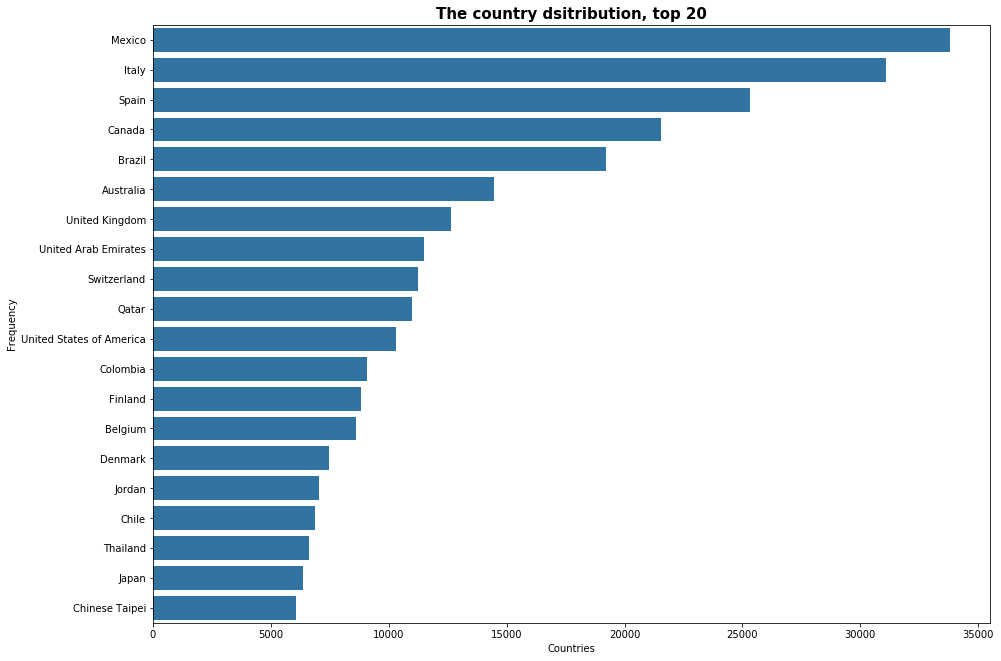

In [90]:
#Bar Chart of the countries, ordered ascendingly
plt.figure(figsize=[15,11])
order=df['CNT'].value_counts().index[:20]
default_color = sb.color_palette()[0]
sb.countplot(data = df, y = 'CNT', color = default_color,order=order)
plt.title('The country dsitribution, top 20',fontsize=15,weight='bold')
plt.xlabel('Countries')
plt.ylabel('Frequency');

#### We can see that: (Mexico,33806), (Italy, 31073), (Spain, 25313), and (Canada, 21544) have the most registered students

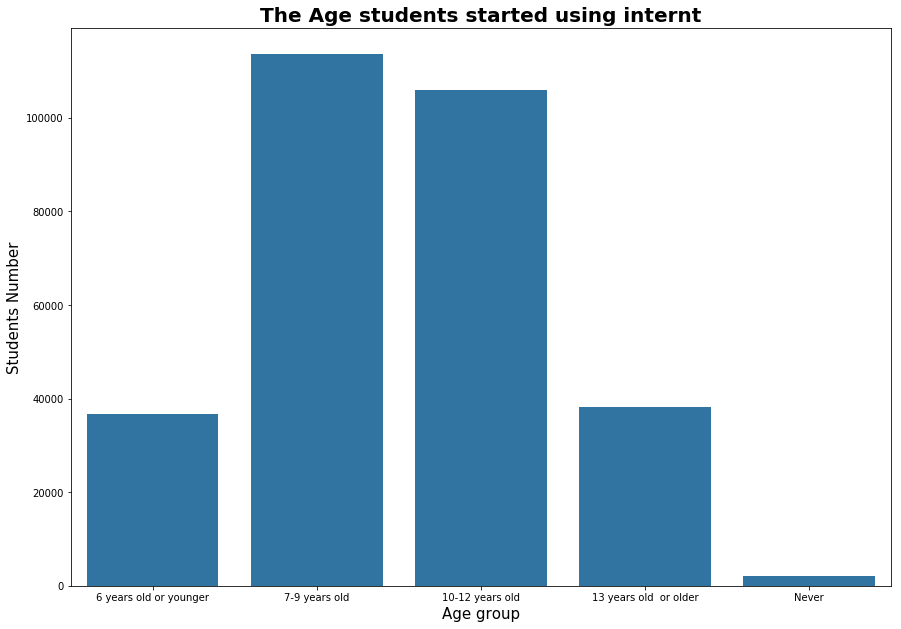

In [91]:
# Bar Chart of the intrnt_frst column
plt.figure(figsize=[14.7,10.27])
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'intrnt_frst', color = default_color)
plt.xlabel('Age group',size=15)
plt.ylabel('Students Number',size=15)
plt.title('The Age students started using internt',size=20,weight='bold');

#### We can see that most students have used intenret and most of them started between the age of 7 and 10.

In [92]:
df['MISCED'].value_counts()

ISCED 3A, ISCED 4    126768
ISCED 5A, 6          114452
ISCED 5B              68219
ISCED 2               66650
ISCED 1               36556
ISCED 3B, C           35672
None                  18768
Name: MISCED, dtype: int64

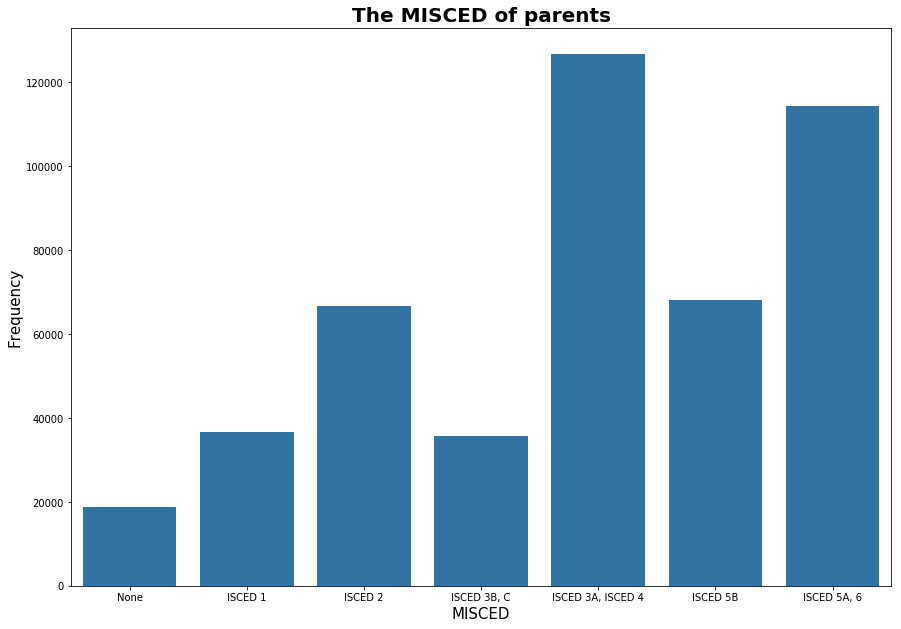

In [93]:
# Bar Chart of the MISCED level of the parents
plt.figure(figsize=[14.7,10.27])
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'MISCED', color = default_color)
plt.xlabel('MISCED',size=15)
plt.ylabel('Frequency',size=15)
plt.title('The MISCED of parents',size=20,weight='bold');

#### We can see that most of the fathers have ISCED 4 or more.

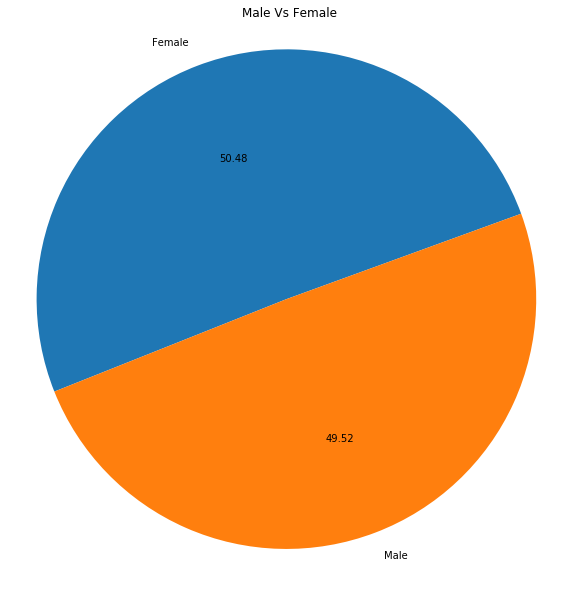

In [94]:
# Pie Chart for the gender
plt.figure(figsize=[14.7,10.27])
plt.pie(df['gender'].value_counts(),labels=df['gender'].value_counts().index,autopct='%.2f',startangle=20)
plt.axis('square')
plt.title('Male Vs Female');

#### The data is nearly evenly divided between males and females.

In [95]:
imp_feat=['math_efficacy','thought','Anxious','love_maths','exp','par_thought','math_exp','math_lesson']           

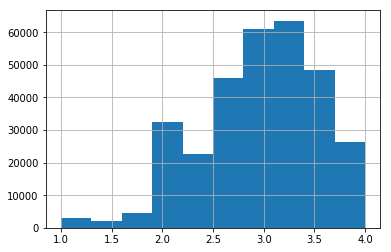

In [96]:
df['math_efficacy'].dropna().hist();

### We have to adjust the bin size and customize to get a continous numbers.

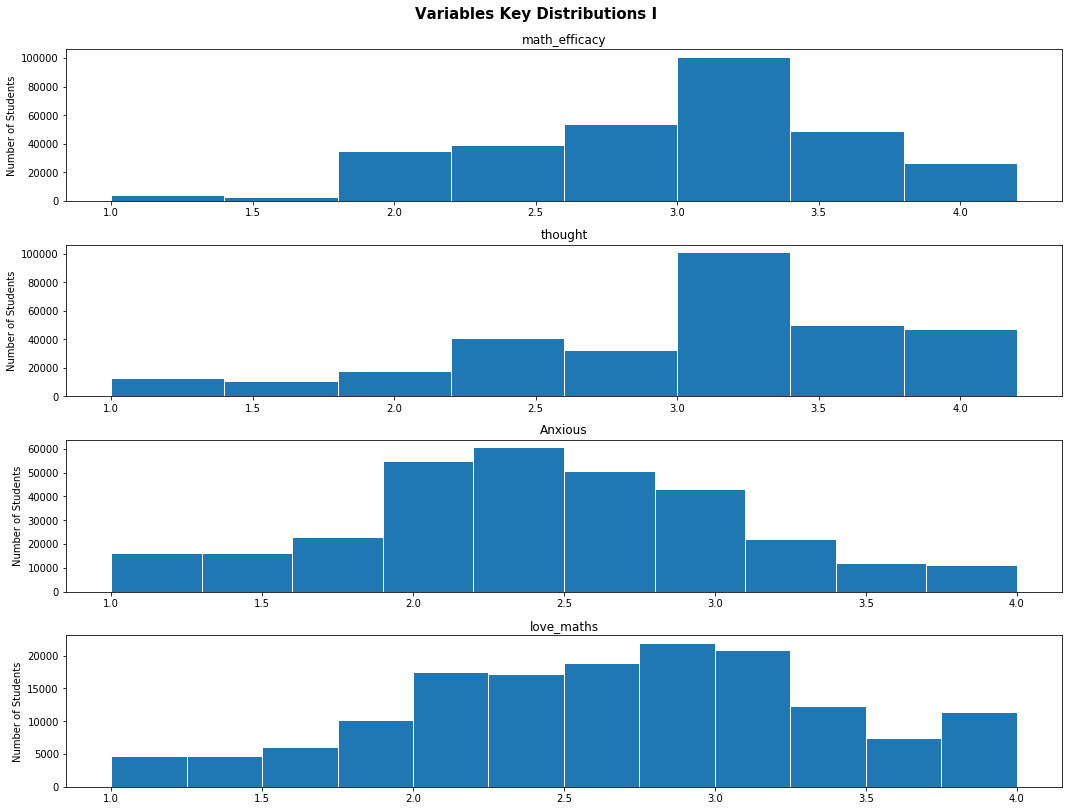

In [97]:
#Using multiple trials, we reached the best bin size
fig, ax= plt.subplots(nrows=4,figsize=[15,11])
binsizes=[.4,.4,.3,.25]
variables = ['math_efficacy','thought','Anxious','love_maths']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(df[var].dropna()), max(df[var].dropna())+binsizes[i], binsizes[i])
    ax[i].hist(data = df.dropna(subset=[var]),x=var, bins = bins,edgecolor='white')
    ax[i].set_ylabel('Number of Students',rotation=90)
    ax[i].set_title(var)
plt.suptitle('Variables Key Distributions I',y=1.02,size=15,weight='bold') 
plt.tight_layout()
plt.show();

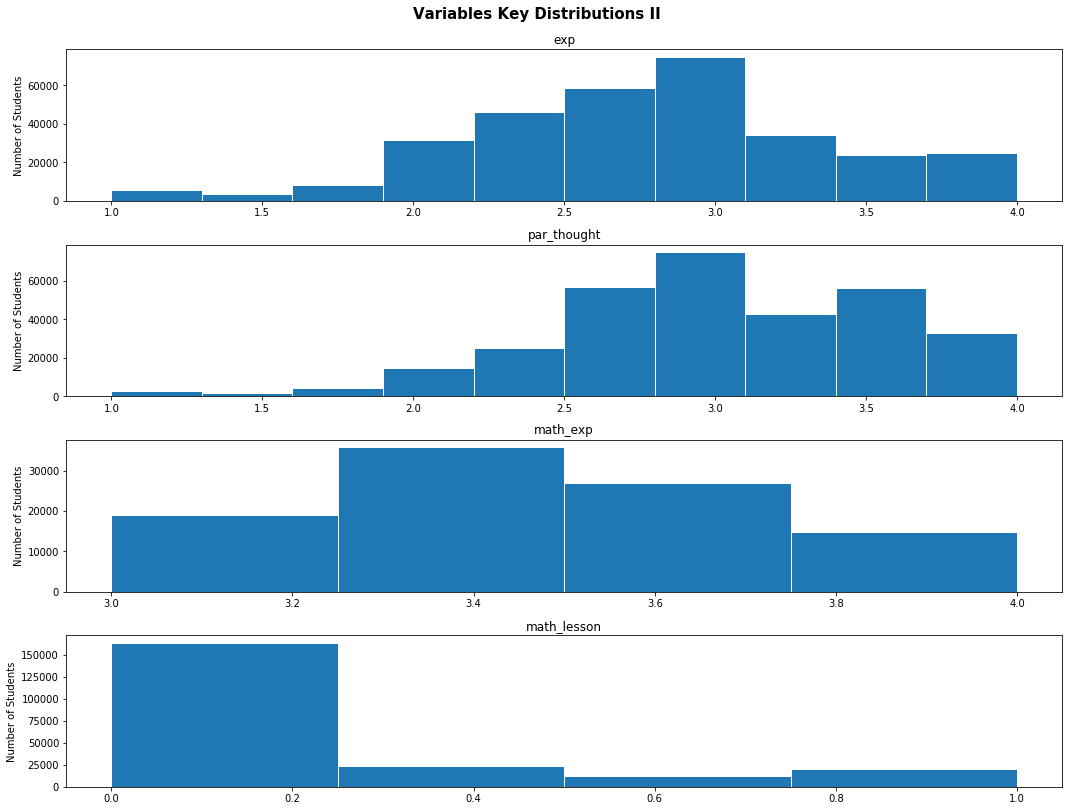

In [98]:
#Using multiple trials, we reached the best bin size
fig, ax= plt.subplots(nrows=4,figsize=[15,11])
binsizes=[.3,.3,.25,.25]
variables = ['exp','par_thought','math_exp','math_lesson']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(df[var].dropna()), max(df[var].dropna())+binsizes[i], binsizes[i])
    ax[i].hist(data = df.dropna(subset=[var]),x=var, bins = bins,edgecolor='white')
    ax[i].set_ylabel('Number of Students',rotation=90)
    ax[i].set_title(var)
plt.suptitle('Variables Key Distributions II',y=1.02,size=15,weight='bold') 
plt.tight_layout()
plt.show();

#### These charts show that students tend to have high math_Efficacy, nearly the same amount of student have high thoughts of their skills. It is nethier popular or not that students would get anxious. Majority of students have math experience while they have negative thoughts about math_lesson, since the last chart is heavily skewed to the right.

# Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Most variables showed expected distribution, the price (the most important variable) was normally distributed around the mean. Our data has the naelry the same number of male students as female ones.

# Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
Yes, we performed many operations to adjust the data. We did this because there was surplus data that wasn't useful in this project, and variabes that could be combined in one variable to represent a meaningful variable.

# Bivariate Exploration

### Let's test the correelation between the different values and in particular the overall score.

In [99]:
numeric_variables=['score','math_efficacy','thought','Anxious','love_maths','exp','par_thought','math_exp',
              'math_lesson','math_behav','math_self_efficacy','math_work_ethic','att_learn_otcm',
              'att_learn_actv','BELONG','f_sq','m_sq','WEALTH','parent_ed','teach_supp',
             'Learning time']

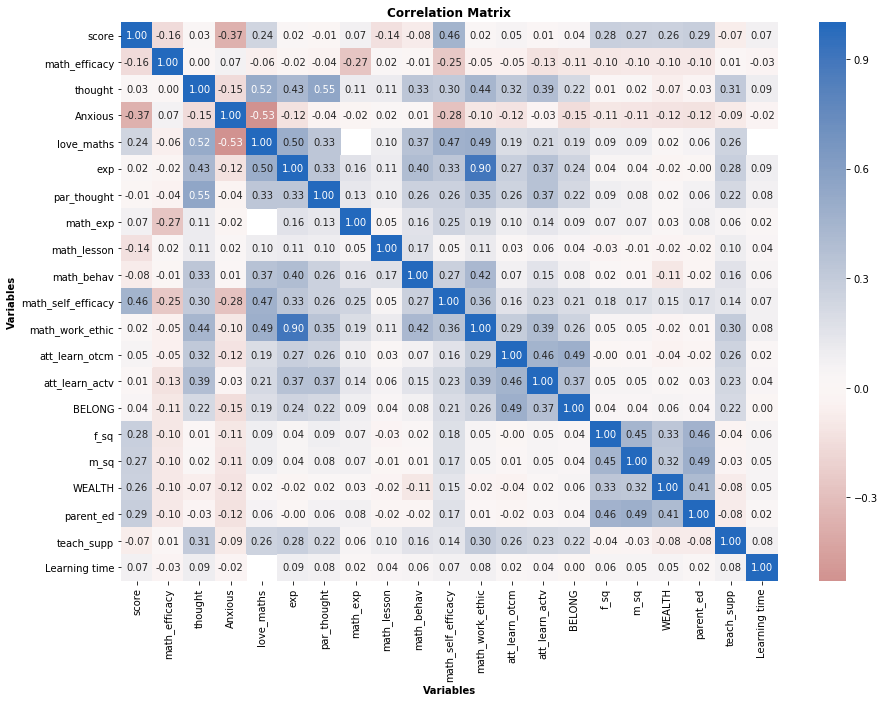

In [100]:
# Heat map chart of the different variables that may affect the score
plt.figure(figsize=[14.7,10.27])
sb.heatmap(df[numeric_variables].corr(), annot = True, fmt = '.2f',cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix',weight='bold')
plt.xlabel('Variables',weight='bold')
plt.ylabel('Variables',weight='bold')
plt.show();

## We had some interesting facts from the above heatmap, which can summarize the whole data:
### For the parents: Unsurprisengly, we can see that there is a moderate positive correlation between the family being wealth, the SQ of the two parents, and the parents education.
###  Non of the factors affect the learning time.
### Teacher support do make a difference as we can see there is a moderate to week correlation between the teacher support with the student loving math, thinking high of themselves, and giving positive attitude in the learning activities as well as feeling belonging to school.
### there is a moderate postitve corrleation between feeling belonging to school and the attitude during learning activities and learning outcomes.
### The students showed postitve attitudes during learning activities are more likely to think high of themselves and their experince.
### There is a very high correlation between showeing ethics with math homework and thinking they got experience.
### The students with higher self efficacy were more likely to love maths and feeling less anxious.
### Things that affect score:
#### Anxious: Negative, the more anxious you get the less score you acheive.
#### Family metrics(wealth,SQ levels, parent_ed) have a positive moderate correlation with the score.
#### math self_efficacy: the more self_efficacy students have the higher score they get.

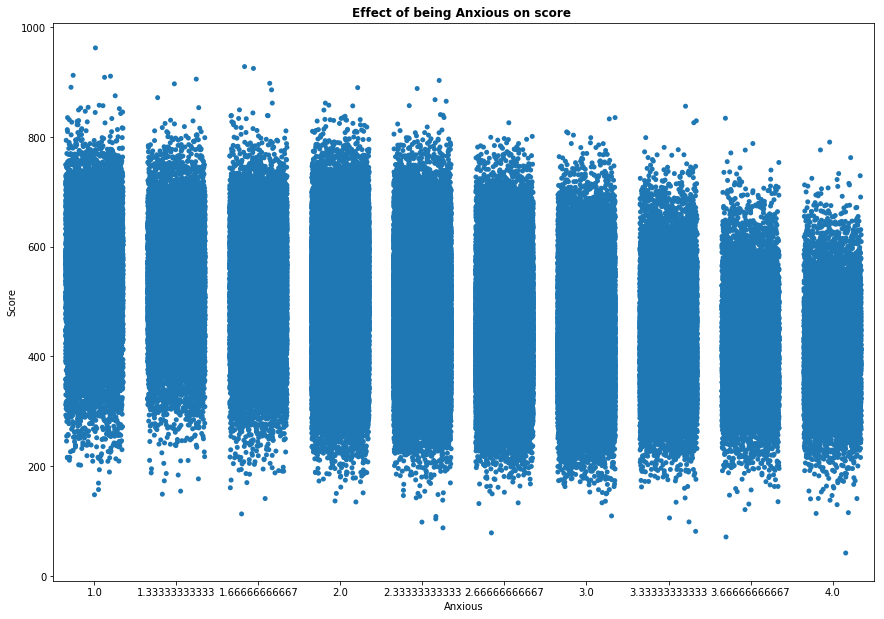

In [101]:
### Taking the important variables and draw them with score
### We would start by drawing score against anxious
plt.figure(figsize = [14.7, 10.27])
default_color = sb.color_palette()[0]
sb.stripplot(data = df, x = 'Anxious', y = 'score',jitter=.35,color=default_color)
plt.title('Effect of being Anxious on score ',weight='bold')
plt.xlabel('Anxious')
plt.ylabel('Score')
plt.show();

### We can see, to an extent, that people with lower anxious rating get slightly higher grades on those who are anxious.

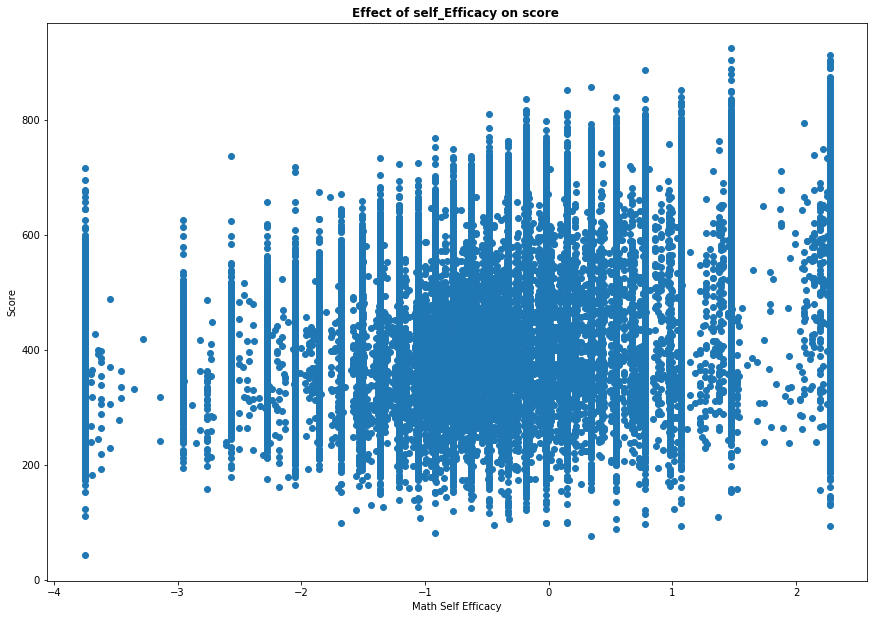

In [102]:
### Drawing score against math_self_efficacy 
plt.figure(figsize = [14.7, 10.27])
plt.scatter(data = df, x = 'math_self_efficacy', y = 'score')
plt.title('Effect of self_Efficacy on score ',weight='bold')
plt.xlabel('Math Self Efficacy')
plt.ylabel('Score')
plt.show();

## There is a slight relation as we can say especially from -3 to 1, and we can see clearly that the more self_Efficacy the student has the more score he would get.

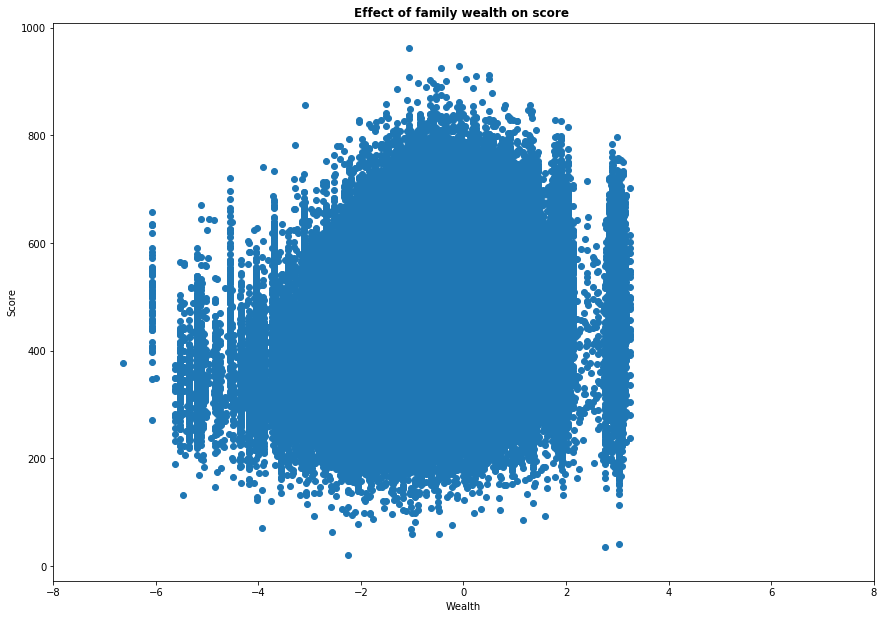

In [103]:
### We would start by drawing score against wealth
plt.figure(figsize = [14.7, 10.27])
plt.scatter(data = df, x = 'WEALTH', y = 'score')
plt.xlim([-8,8])
plt.title('Effect of family wealth on score ',weight='bold')
plt.xlabel('Wealth')
plt.ylabel('Score')
plt.show();

## As we can see that the chart diverges from -4 to 0, and then diverges again from 0 to 2, however if we looked closely we would notice that the chart diverges more at the higher portion than the lower portion, therefore we can say that there is a weak positive relation between wealth and score, as stated earlier in the heat map.

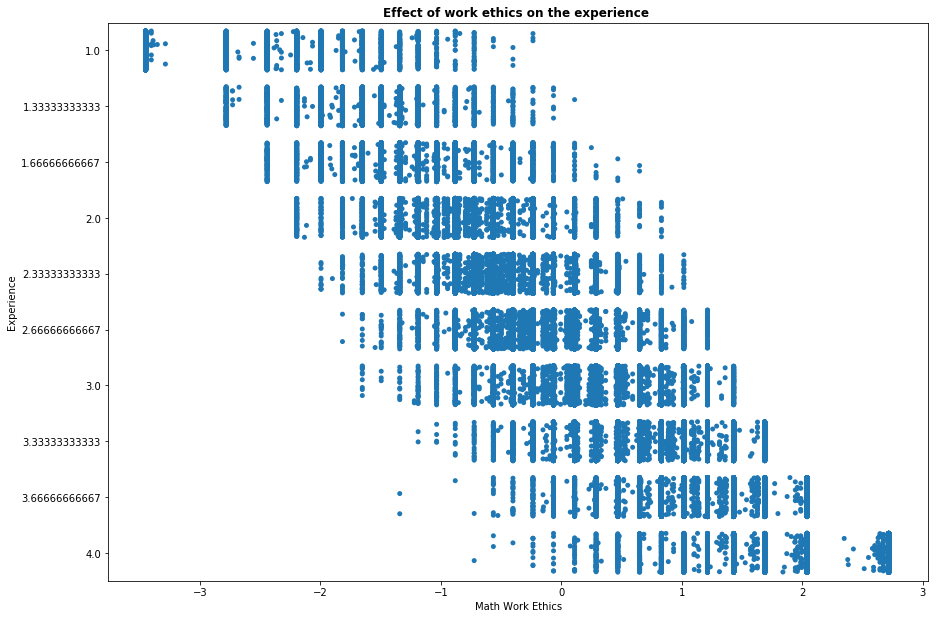

In [104]:
# Drawing experience against math_Work_Ethics
plt.figure(figsize = [14.7, 10.27])
default_color = sb.color_palette()[0]
sb.stripplot(data = df, y = 'exp', x = 'math_work_ethic',jitter=.35,orient='h',color=default_color)
plt.title('Effect of work ethics on the experience ',weight='bold')
plt.xlabel('Math Work Ethics')
plt.ylabel('Experience')
plt.show();

### As we can see, there is a very strong relation between the maths work ethics and the experience of the student. The more math work_ethics the student has the more experienced he would become.

### Now let's move to test the effect of country on the score. Since, the number of students in each country differs greatly We would have to use a density function rather than the histogram.

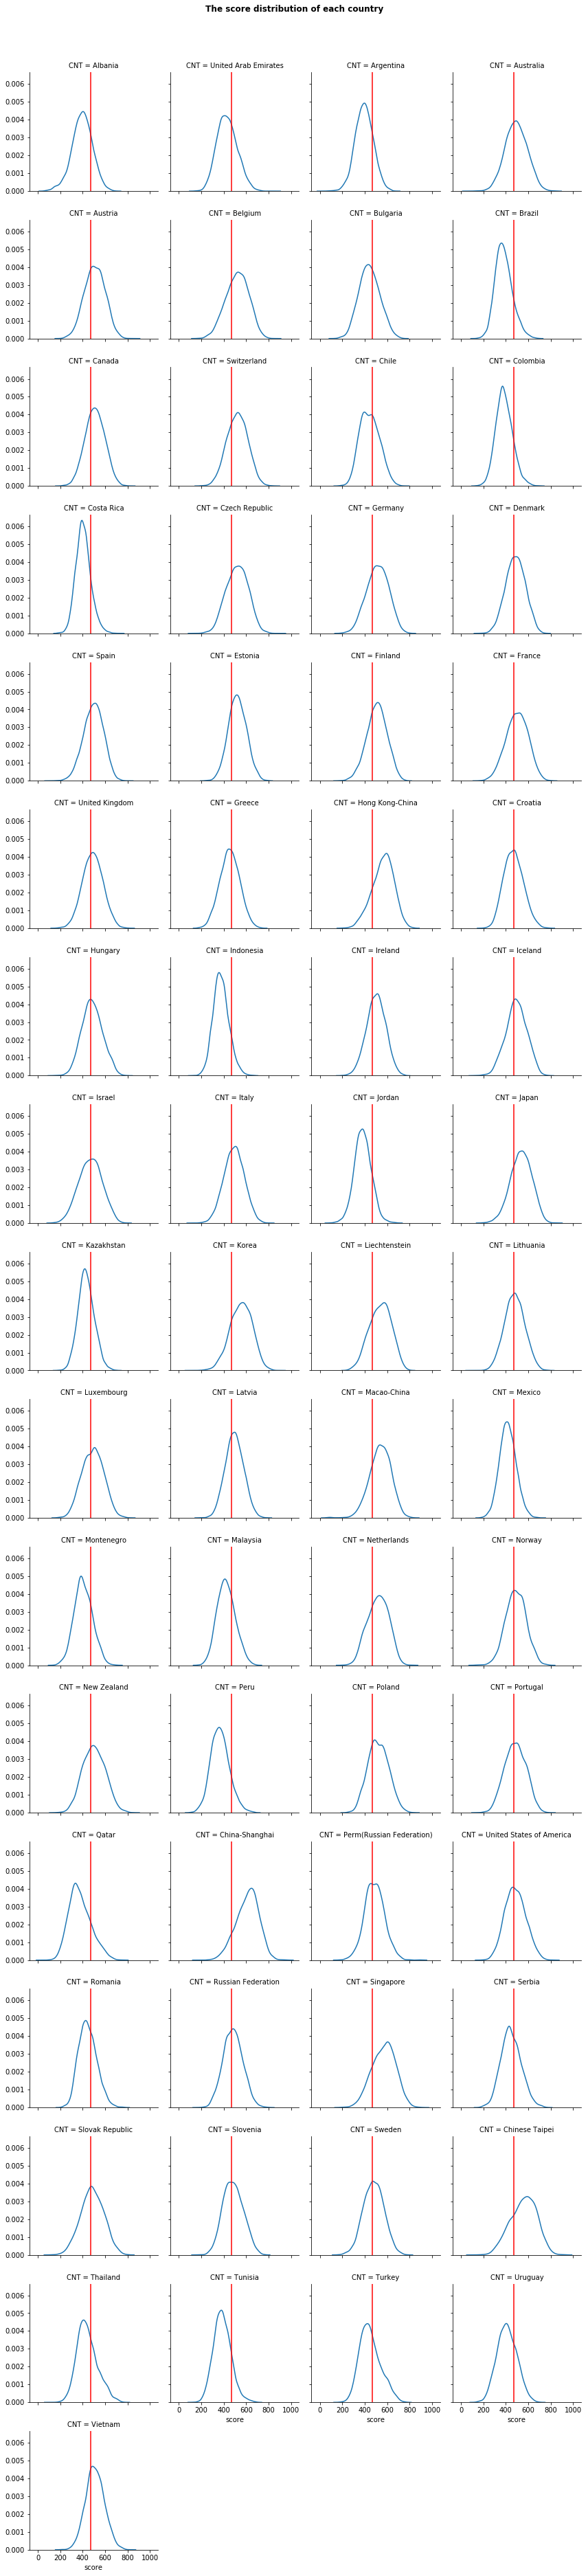

In [105]:
# Doing a density plot of the score of each country in the CNT column using Facetting
g=sb.FacetGrid(data=df, col='CNT', col_wrap=4)
g.map(sb.kdeplot, 'score')
for ax in g.axes.flat:
    ax.axvline(x=df.score.mean(), color='red')
plt.suptitle("The score distribution of each country", y = 1.02,weight='bold');

### From the above charts, we can see easily that there is countries with much more students averaging higher scores like Singapore for example and vice versa. The more the sdistribution graph is to the right of the vertical line the greater the results of this country,

### Let's test the socre according to the time the students first used internet.

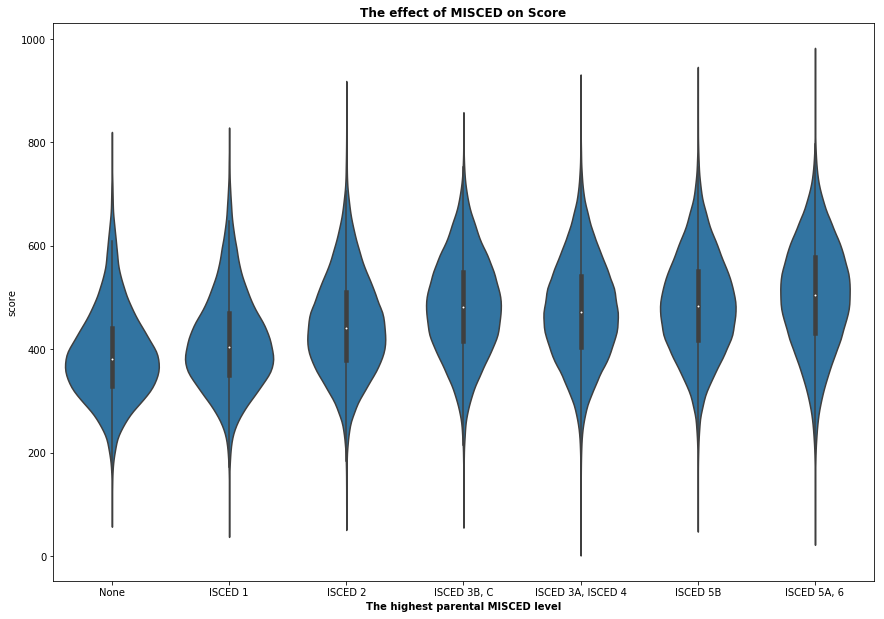

In [106]:
# Violinplot to test the effect of MISED on score
plt.figure(figsize = [14.7, 10.27])
sb.violinplot(data = df, x = 'MISCED', y = 'score',color = default_color)
plt.title('The effect of MISCED on Score',weight='bold')
plt.xlabel('The highest parental MISCED level',weight='bold');

## Looking at the previous chart, we can see that there is a difference between the scores based on the parents education, and in particular between those parents who got a ISCED 3 and more.

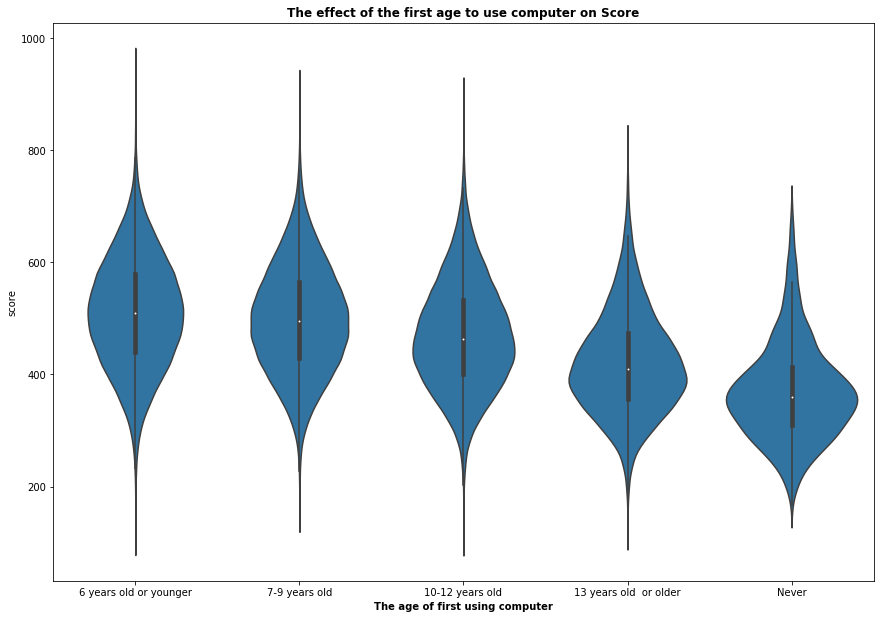

In [107]:
#Violing plot to test if the comp_frst categories affect the score
plt.figure(figsize = [14.7, 10.27])
sb.violinplot(data = df, x = 'comp_frst', y = 'score',color = default_color)
plt.title('The effect of the first age to use computer on Score',weight='bold')
plt.xlabel('The age of first using computer',weight='bold');

## Easily, we can figure out that the earlier the students get to use computer the more scores they are likely to get, with a drastic decrease in scores for those who didn't use computer before.

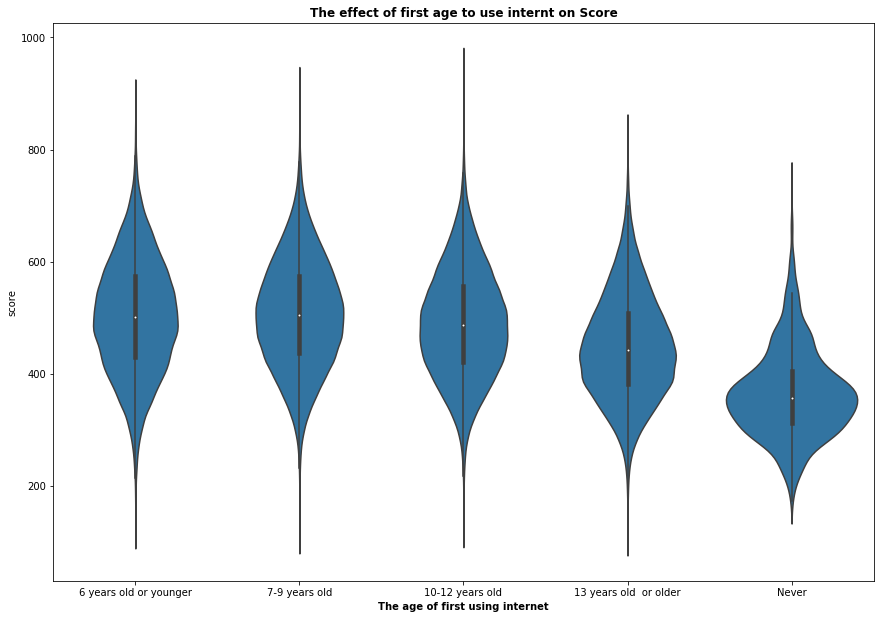

In [108]:
#Violin plot to test if the age where students start using internt in affects their score
plt.figure(figsize = [14.7, 10.27])
sb.violinplot(data = df, x = 'intrnt_frst', y = 'score',color = default_color)
plt.title('The effect of first age to use internt on Score',weight='bold')
plt.xlabel('The age of first using internet',weight='bold');

## While there is a significant difference between those who used the internet at the age of six and those who used it at older ages, both groups got significant higher scores than those who never used the internet before.

In [109]:
# getting the most frequent occupations of the mothers of the students
df.m_occ.value_counts()

Housewife                                                       74358
Missing                                                         27044
Shop sales assistants                                           13124
Primary school teachers                                         10320
Secretaries (general)                                            9869
Nursing professionals                                            9787
Cleaners and helpers in offices, hotels and other establishm     9248
Cooks                                                            8991
Vague(a good job, a quiet job, a well paid job, an office jo     8841
Secondary education teachers                                     8834
Kitchen helpers                                                  8481
Domestic cleaners and helpers                                    8123
General office clerks                                            7499
Early childhood educators                                        6950
Social beneficiary (

In [110]:
# the most frequent and different mothers occupations
m_freq =['Housewife','Shop sales assistants','Primary school teachers','Secretaries (general)','Nursing professionals',
       'Cleaners and helpers in offices, hotels and other establishm','Cooks','Secondary education teachers','Kitchen helpers',
       'General office clerks','Social beneficiary (unemployed, retired, sickness, etc.)','Accountants']
m_sub = df.loc[df['m_occ'].isin(m_freq)]

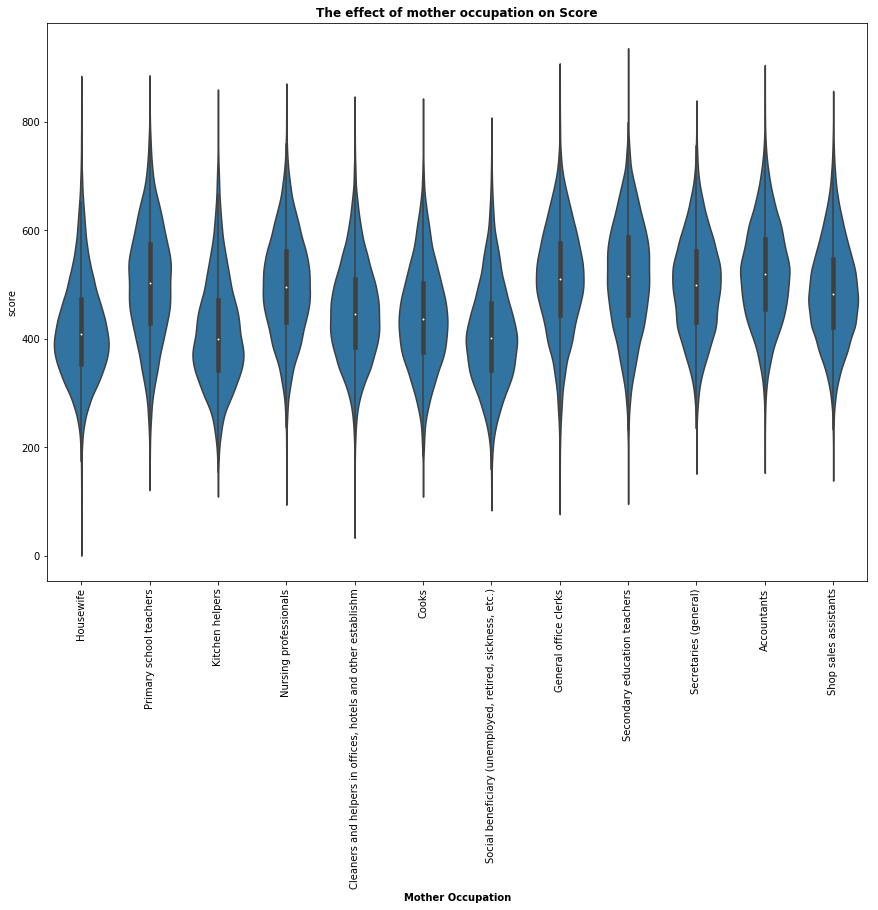

In [111]:
# Violin plot to see the effect of mother occupation on the score
plt.figure(figsize = [14.7, 10.27])
sb.violinplot(data = m_sub, x = 'm_occ', y = 'score',color = default_color)
plt.xticks(rotation=90)
plt.xlabel('Mother Occupation',weight='bold')
plt.title('The effect of mother occupation on Score',weight='bold');

## While all jobs are good, the above chart shows that mothers with more pretiguous full time jobs like accountants, nursing professionals and teachers would score more than those of houswife mothers and cleaners.

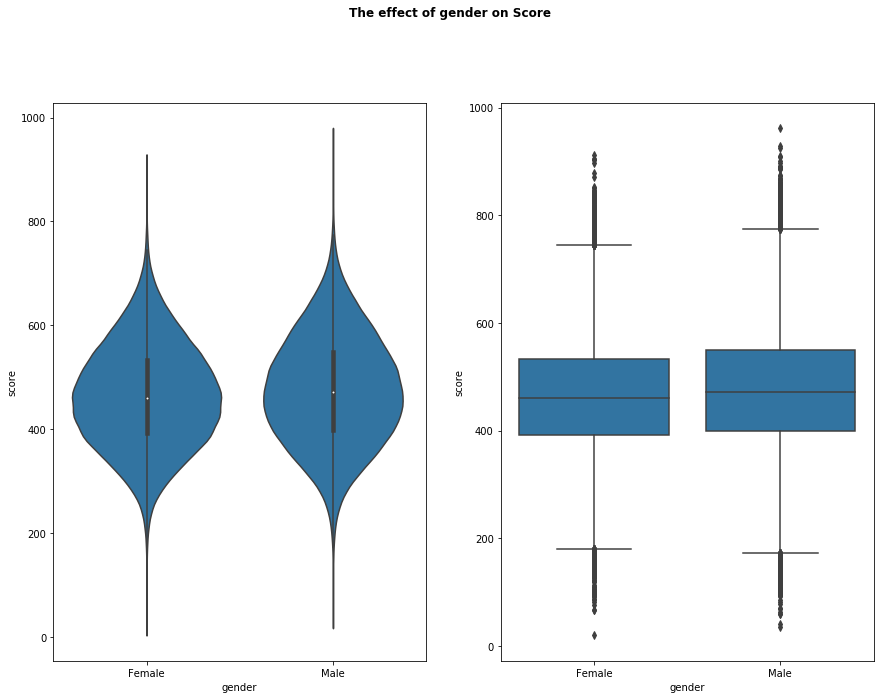

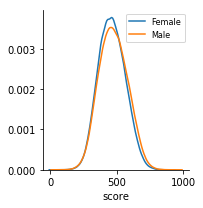

In [112]:
# The score for both genders 
fig, ax = plt.subplots(ncols = 2, figsize = [14.7,10.27])
sb.violinplot(data = df, x = 'gender', y = 'score',color = default_color,ax=ax[0]);
sb.boxplot(data = df, x = 'gender', y = 'score',color = default_color,ax=ax[1]);
plt.suptitle('The effect of gender on Score',weight='bold',y=1.01)
g=sb.FacetGrid(data=df, hue='gender',legend_out=True)
g.map(sb.kdeplot, 'score')
plt.legend(loc=1,prop={'size': 8});

### It is nearly identical but we can say there is a slight advantage of males than females in the upper portion.

# Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
We tested the effect of the quantitative variables to see if there is a correlation between differnt data variables. We found that there is a strong correlation between showing work ethics during math works and being experinced in solving math. We found that there are moderate correlation between scores and other variables like wealth and anxious. These correlations were then studied in detail one by one. We also found that the mother occupation and using internet have an effect on the students score.

# Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
Yes, the fact that the males slightly outperform the females in getting high scores was interesting. Also, the effect of the mother occupation on the score as well as the effect of using internet was interesting as well.

# Multivariate Exploration

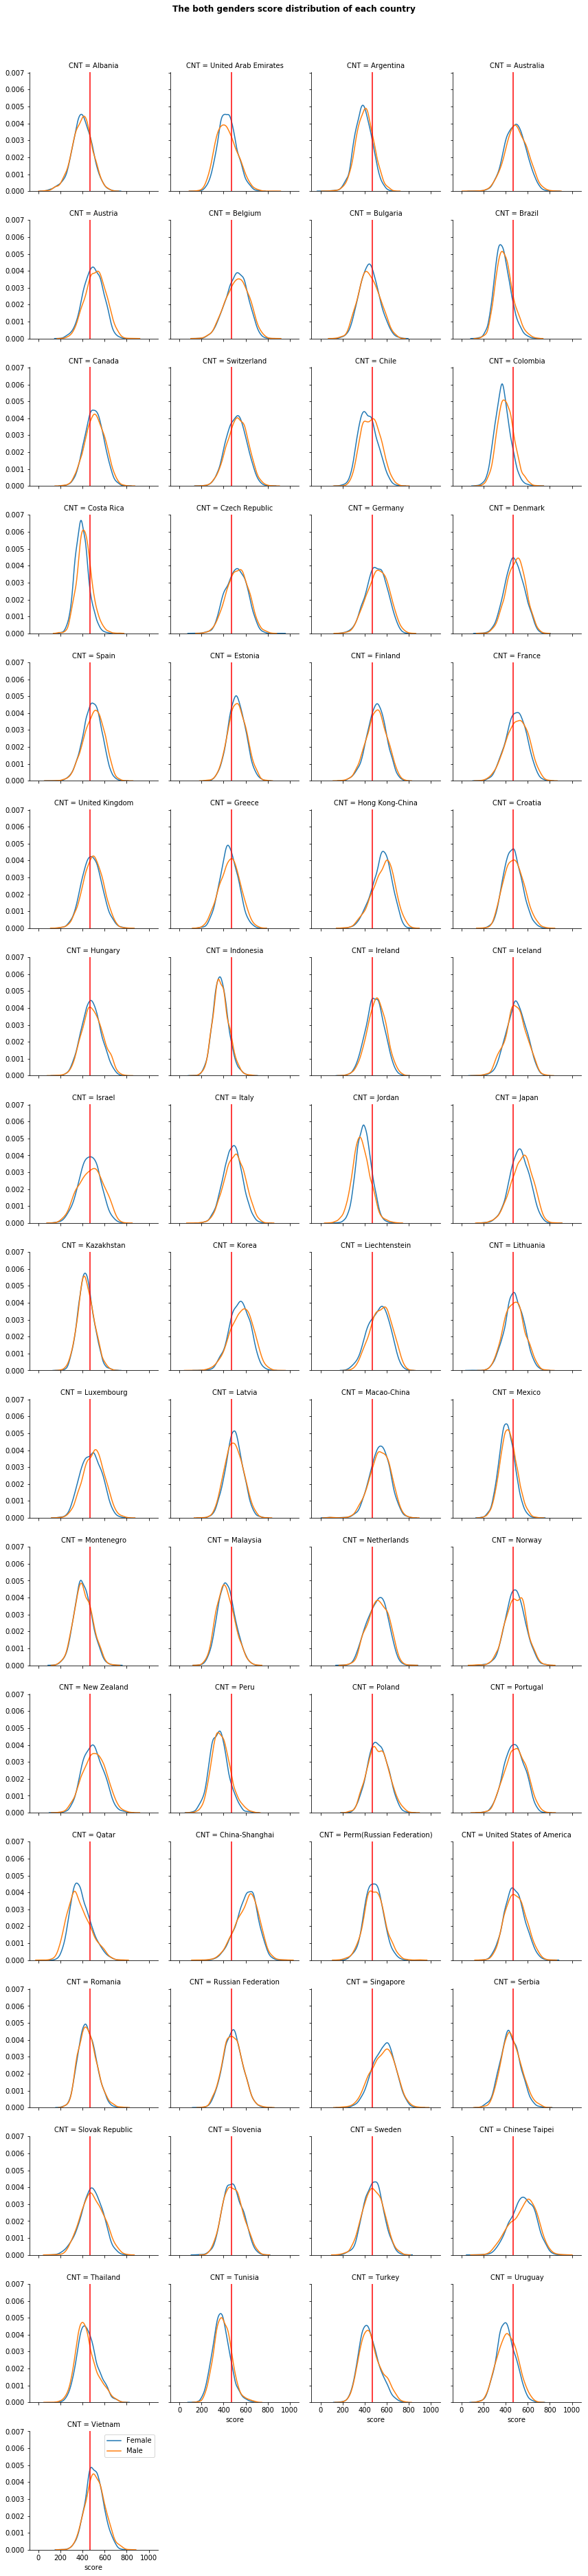

In [113]:
# Drawing a faceted score density destribution to see how they get distributed according to the gender and the country
g=sb.FacetGrid(data=df, col='CNT',hue='gender', col_wrap=4)
g.map(sb.kdeplot, 'score')
for ax in g.axes.flat:
    ax.axvline(x=df.score.mean(), color='red')
plt.legend(loc=0,prop={'size': 10})
plt.suptitle("The both genders score distribution of each country", y = 1.02,weight='bold');

#### We can see that scores differ according to genders in some countries and there is not a consistent trend. At some countries, females outperform males like in Jordan and Qatar. In most of other countries males outperform females.

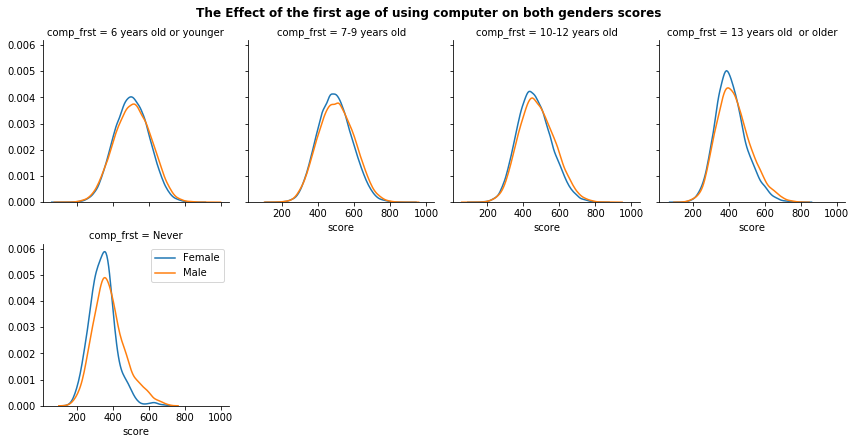

In [114]:
# Drawing a Facetted plot of scores according to the comp_frst and gender
g=sb.FacetGrid(data=df, col='comp_frst',hue='gender', col_wrap=4)
g.map(sb.kdeplot, 'score')
plt.legend(loc=1,prop={'size': 10})
plt.suptitle("The Effect of the first age of using computer on both genders scores", y = 1.02,weight='bold');

#### there is a slight better socres in males than in females in the three categories in which student used computers. The gap gets widened signifcantly for the studetns who never used computer as males outperform females by far.

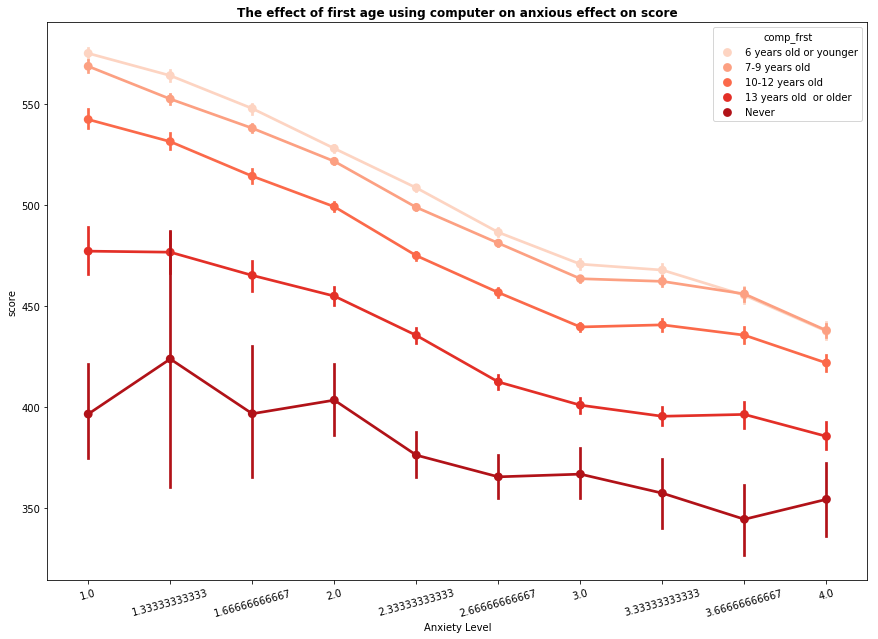

In [115]:
# drawing a point plot to test the effect of anxiety on the scores of different groups
plt.figure(figsize = [14.7, 10.27])
sb.pointplot(data = df,  hue= 'comp_frst', x= 'Anxious', y= 'score',palette = 'Reds')
plt.xticks(rotation=15)
plt.title('The effect of first age using computer on anxious effect on score',weight='bold')
plt.xlabel('Anxiety Level')
plt.show();

#### We can see that the scores of the students who used computers get deteriorated very rapidly with anxious, however the grades of those, who used it at the age of 13 or older or have never used it, get lowered by anxiety but not by very much.

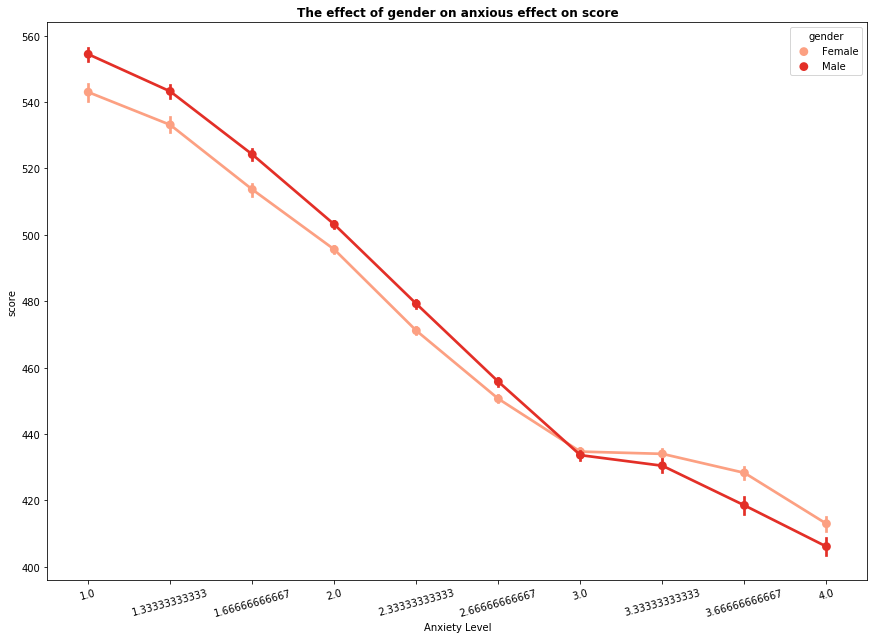

In [116]:
# drawing a point plot to test the effect of anxiety on the scores of different genders
plt.figure(figsize = [14.7, 10.27])
sb.pointplot(data = df,  hue= 'gender', x= 'Anxious', y= 'score',palette = 'Reds')
plt.xticks(rotation=15)
plt.title('The effect of gender on anxious effect on score',weight='bold')
plt.xlabel('Anxiety Level')
plt.show();

#### We can see that the calm males perform better than calm females, and that anxious females perform better than anxious males, while this may be attributed, to an extent, to the fact that anxiety affects score, it is still interesting to see this overlap with anxiety.

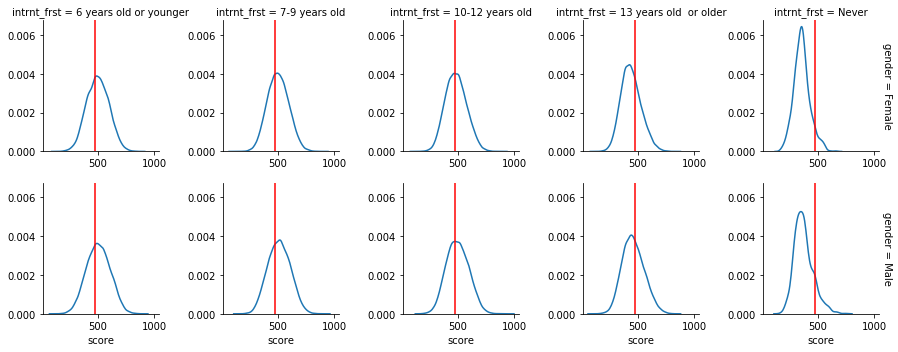

In [117]:
# drawing a point plot to test the effect of the age of using internet on the scores of different genders
g = sb.FacetGrid(data = df, col = 'intrnt_frst', row = 'gender', size = 2.5,
                 margin_titles = True)
g.map(sb.kdeplot, 'score')
for ax in g.axes.flat:
    ax.axvline(x=df.score.mean(), color='red');

#### We got the almost the same results like those of the using computer charts, which is that the males perform better than females in the group which never used internet.

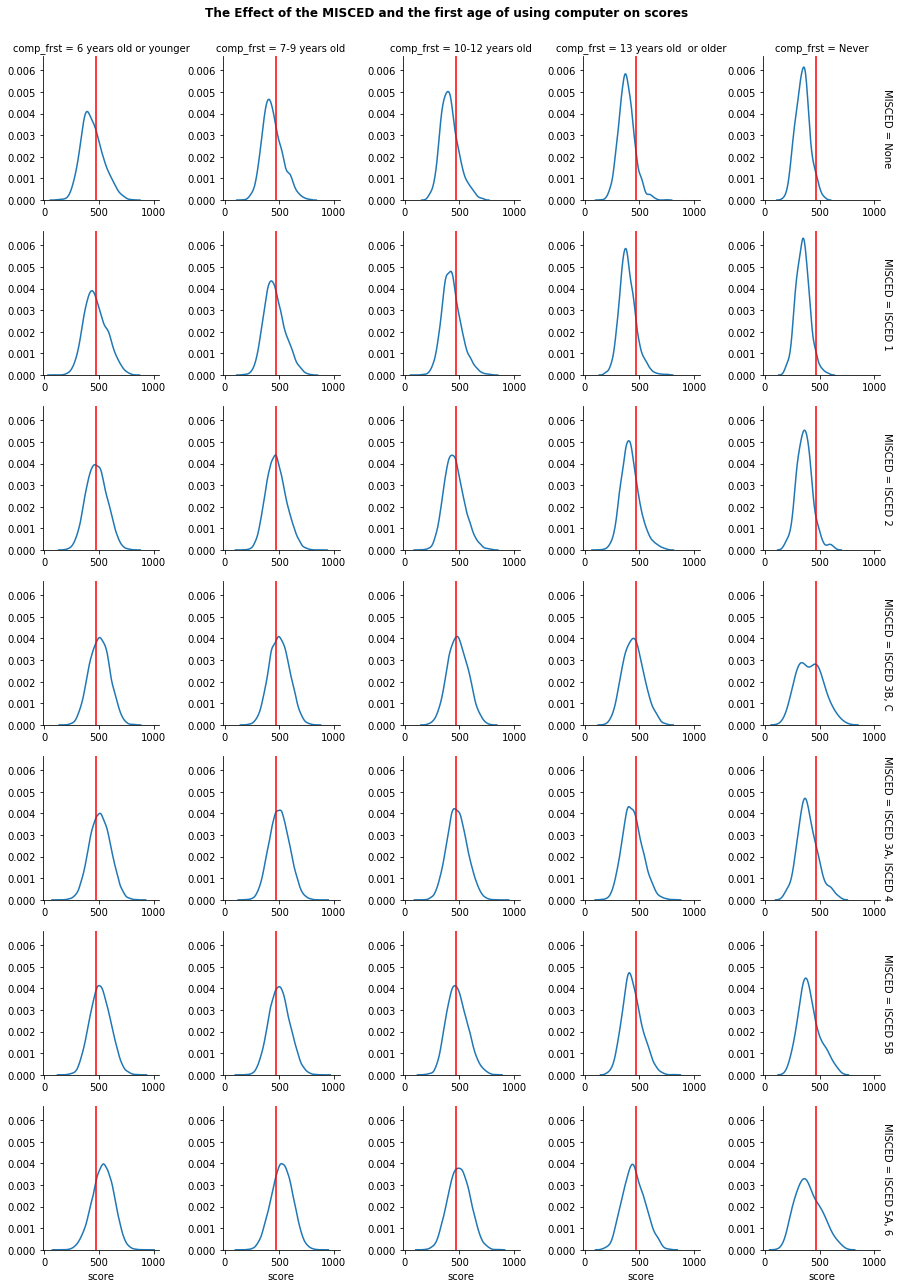

In [118]:
# drawing a point plot to test the effect of comp_frst on the scores of different MISCED
g = sb.FacetGrid(data = df, col = 'comp_frst', row = 'MISCED', size = 2.5,
                 margin_titles = True)
g.map(sb.kdeplot, 'score')
for ax in g.axes.flat:
    ax.axvline(x=df.score.mean(), color='red')
plt.suptitle("The Effect of the MISCED and the first age of using computer on scores", y = 1.02,weight='bold');

#### We can see that the more educated the parents are the more scores the student would get and we can decline this between studetns by letting them use computers at a younger age. 

# Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

We wanted to test the effect of countries on different genders and their scores. WE also wanted to test how the scores of different groups of categoroical data like intrnt_frst get affected by variables like anxiety. We also tried to see the combined effect of the MISCED and the intrnt_frst.

# Were there any interesting or surprising interactions between features?
Yes, the fact that calm males are better than calm females and that anxious females are better than anxious males is one of the most interesting key findings in this project. I think this psychoogically may be attributed to the fact that females are much better in multitasking. Also the fact that we can reduce the effect of the parents education effect on the students by letting them use computer at young age is something that must be put into consideration.